In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
%matplotlib inline


In [2]:
df=pd.read_csv('2017_Data.csv')
d=pd.read_csv('2018_Data.csv')
df1=pd.read_csv('2019_Data.csv')


In [3]:
d.index=pd.to_datetime(d.Year*100000000+d.Month*1000000+
                            d.Day*10000+d.Hour*100+d.Minute,format='%Y%m%d%H%M')

In [4]:
df.index=pd.to_datetime(df.Year*100000000+df.Month*1000000+
                            df.Day*10000+df.Hour*100+df.Minute,format='%Y%m%d%H%M')

In [5]:
df1.index=pd.to_datetime(df1.Year*100000000+df1.Month*1000000+
                            df1.Day*10000+df1.Hour*100+df1.Minute,format='%Y%m%d%H%M')

In [6]:
df.index

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:30:00',
               '2017-01-01 01:00:00', '2017-01-01 01:30:00',
               '2017-01-01 02:00:00', '2017-01-01 02:30:00',
               '2017-01-01 03:00:00', '2017-01-01 03:30:00',
               '2017-01-01 04:00:00', '2017-01-01 04:30:00',
               ...
               '2017-12-31 19:00:00', '2017-12-31 19:30:00',
               '2017-12-31 20:00:00', '2017-12-31 20:30:00',
               '2017-12-31 21:00:00', '2017-12-31 21:30:00',
               '2017-12-31 22:00:00', '2017-12-31 22:30:00',
               '2017-12-31 23:00:00', '2017-12-31 23:30:00'],
              dtype='datetime64[ns]', length=17520, freq=None)

In [7]:
new_df=pd.concat([df,d,df1],axis=0)

In [8]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52560 entries, 2017-01-01 00:00:00 to 2019-12-31 23:30:00
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                52560 non-null  int64  
 1   Month               52560 non-null  int64  
 2   Day                 52560 non-null  int64  
 3   Hour                52560 non-null  int64  
 4   Minute              52560 non-null  int64  
 5   GHI                 52560 non-null  int64  
 6   Clearsky GHI        52560 non-null  int64  
 7   Cloud Type          52560 non-null  int64  
 8   Dew Point           52560 non-null  float64
 9   Solar Zenith Angle  52560 non-null  float64
 10  Fill Flag           52560 non-null  int64  
 11  Surface Albedo      52560 non-null  float64
 12  Wind Speed          52560 non-null  float64
 13  Precipitable Water  52560 non-null  float64
 14  Wind Direction      52560 non-null  float64
 15  Relative Humidity 

In [9]:
new_df.index

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:30:00',
               '2017-01-01 01:00:00', '2017-01-01 01:30:00',
               '2017-01-01 02:00:00', '2017-01-01 02:30:00',
               '2017-01-01 03:00:00', '2017-01-01 03:30:00',
               '2017-01-01 04:00:00', '2017-01-01 04:30:00',
               ...
               '2019-12-31 19:00:00', '2019-12-31 19:30:00',
               '2019-12-31 20:00:00', '2019-12-31 20:30:00',
               '2019-12-31 21:00:00', '2019-12-31 21:30:00',
               '2019-12-31 22:00:00', '2019-12-31 22:30:00',
               '2019-12-31 23:00:00', '2019-12-31 23:30:00'],
              dtype='datetime64[ns]', length=52560, freq=None)

In [10]:
new_df.isnull().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
GHI                   0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
Solar Zenith Angle    0
Fill Flag             0
Surface Albedo        0
Wind Speed            0
Precipitable Water    0
Wind Direction        0
Relative Humidity     0
Temperature           0
Pressure              0
dtype: int64

In [11]:
new_df.isnull().any()

Year                  False
Month                 False
Day                   False
Hour                  False
Minute                False
GHI                   False
Clearsky GHI          False
Cloud Type            False
Dew Point             False
Solar Zenith Angle    False
Fill Flag             False
Surface Albedo        False
Wind Speed            False
Precipitable Water    False
Wind Direction        False
Relative Humidity     False
Temperature           False
Pressure              False
dtype: bool

In [12]:
new_df['Hour'] = new_df['Hour'].apply(lambda _: str(_))
new_df['Minute'] =new_df['Minute'].apply(lambda _: str(_))
new_df["Hour Minute"] = new_df["Hour"].map(str) + '.' + new_df["Minute"]
new_df.drop(['Hour','Minute','Clearsky GHI','Fill Flag'],axis=1,inplace=True)
new_df.head()

,Year,Month,Day,GHI,Cloud Type,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Hour Minute
2017-01-01 00:00:00,2017,1,1,0,8,2.0,166.36,0.157,1.1,1.430,42.8,100.0,4.0,930,0.0
2017-01-01 00:30:00,2017,1,1,0,8,2.0,163.49,0.157,1.1,1.416,42.8,100.0,4.0,930,0.30
2017-01-01 01:00:00,2017,1,1,0,3,2.0,158.95,0.157,1.1,1.403,35.1,100.0,4.0,930,1.0
2017-01-01 01:30:00,2017,1,1,0,1,2.0,153.60,0.157,1.1,1.390,35.1,100.0,4.0,930,1.30
2017-01-01 02:00:00,2017,1,1,0,0,2.0,147.87,0.157,1.1,1.378,22.3,100.0,4.0,930,2.0


In [13]:
new_df['Hour Minute'] = new_df['Hour Minute'].astype (float)

In [14]:
new_df.shape

(52560, 15)

<AxesSubplot:ylabel='GHI'>

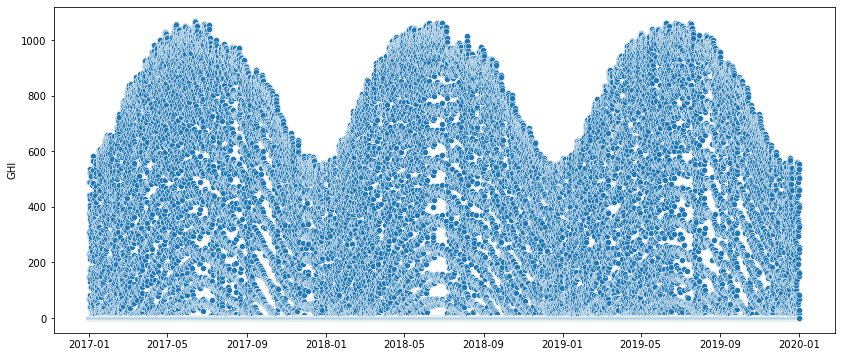

In [15]:
plt.figure(figsize=(14,6))
sns.scatterplot(x=new_df.index,y=new_df['GHI'])

### from this we can clearly see the difference in GHI at starting and mid Year

In [16]:
#by using correlation we can analyze the relations between different parameters
corr=new_df.iloc[:,0:15].corr()
corr.style.background_gradient(cmap='BrBG').set_precision(3)

,Year,Month,Day,GHI,Cloud Type,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Hour Minute
Year,1.000,0.000,-0.000,-0.007,-0.026,-0.042,-0.000,0.077,-0.014,-0.093,-0.015,-0.060,-0.039,0.135,-0.000
Month,0.000,1.000,0.012,-0.022,-0.137,-0.079,0.046,-0.079,-0.093,0.077,-0.062,-0.259,0.161,0.083,-0.000
Day,-0.000,0.012,1.000,0.003,-0.021,-0.041,-0.001,0.009,0.020,-0.043,0.005,-0.040,-0.016,-0.027,0.000
GHI,-0.007,-0.022,0.003,1.000,-0.238,-0.008,-0.858,0.038,0.365,0.065,-0.239,-0.472,0.551,-0.058,-0.010
Cloud Type,-0.026,-0.137,-0.021,-0.238,1.000,0.127,0.134,-0.004,-0.054,0.158,0.042,0.323,-0.214,-0.058,0.028
Dew Point,-0.042,-0.079,-0.041,-0.008,0.127,1.000,-0.079,0.063,-0.049,0.835,0.079,0.382,0.405,-0.282,-0.025
Solar Zenith Angle,-0.000,0.046,-0.001,-0.858,0.134,-0.079,1.000,-0.053,-0.366,-0.147,0.220,0.466,-0.581,0.113,0.015
Surface Albedo,0.077,-0.079,0.009,0.038,-0.004,0.063,-0.053,1.000,-0.014,0.045,0.000,-0.031,0.080,-0.120,-0.000
Wind Speed,-0.014,-0.093,0.020,0.365,-0.054,-0.049,-0.366,-0.014,1.000,-0.093,-0.017,-0.117,0.116,-0.256,-0.009
Precipitable Water,-0.093,0.077,-0.043,0.065,0.158,0.835,-0.147,0.045,-0.093,1.000,0.015,0.149,0.506,-0.151,-0.013


#### Temperature, Realtive Humidity, Solar zenith angle,GHI are closely realtive to eachother
#### Solar zenith angle,GHI are closely realtive to eachother
#### Dew Point and Precipitable water are closely related
#### 

<AxesSubplot:xlabel='Precipitable Water', ylabel='Dew Point'>

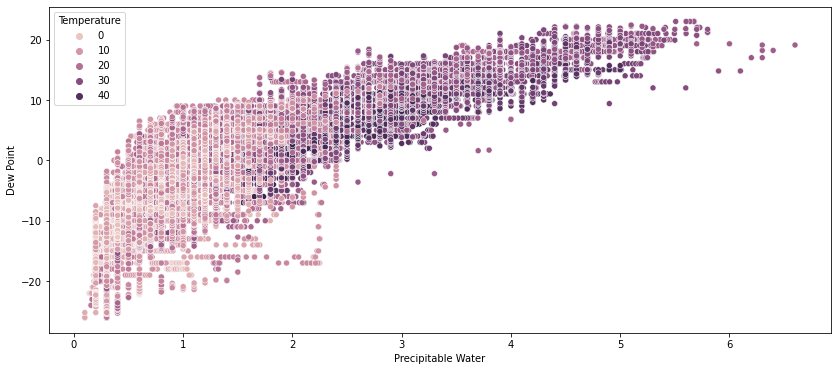

In [17]:
plt.figure(figsize=(14,6))
sns.scatterplot(x=new_df['Precipitable Water'], y=new_df['Dew Point'], hue=new_df['Temperature'])

<AxesSubplot:xlabel='Temperature', ylabel='Relative Humidity'>

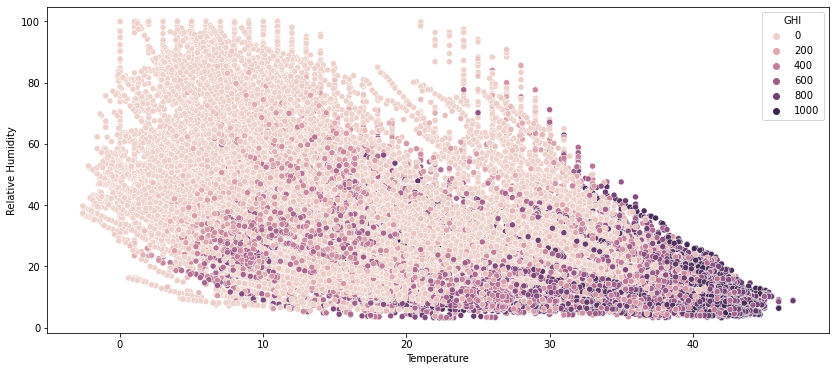

In [18]:
plt.figure(figsize=(14,6))
sns.scatterplot(x=new_df['Temperature'], y=new_df['Relative Humidity'], hue=new_df['GHI'])

<AxesSubplot:xlabel='Temperature', ylabel='Relative Humidity'>

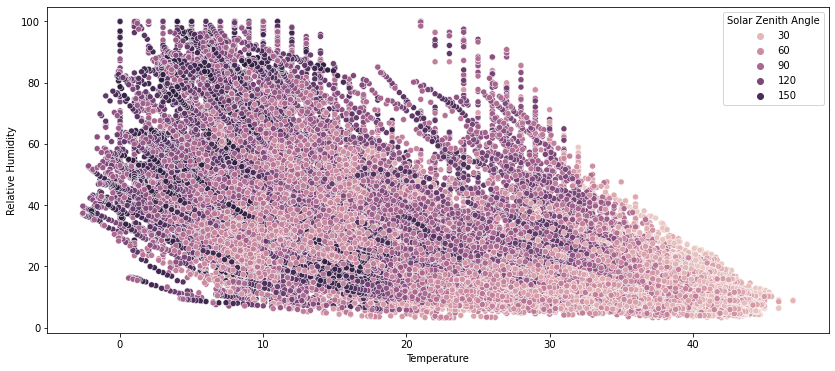

In [19]:
plt.figure(figsize=(14,6))
sns.scatterplot(x=new_df['Temperature'], y=new_df['Relative Humidity'], hue=new_df['Solar Zenith Angle'])

<AxesSubplot:xlabel='Solar Zenith Angle', ylabel='GHI'>

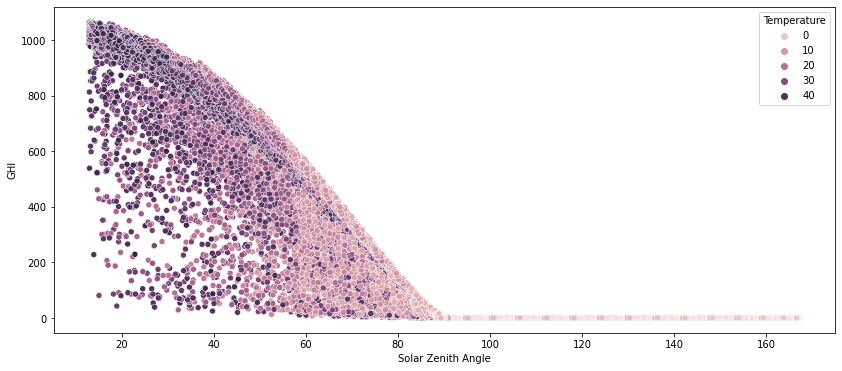

In [20]:
plt.figure(figsize=(14,6))
sns.scatterplot(x=new_df['Solar Zenith Angle'],y=new_df['GHI'],hue=new_df['Temperature'])

##### if Solar Zenithe Angle > 90 then GHI was almost zero and Temperature was less than 10

In [21]:
final_df=new_df.copy()

In [22]:
column_names = ['Year','Day','Hour Minute','Surface Albedo','Cloud Type','Dew Point','Solar Zenith Angle','Month',
                'Pressure','Wind Direction','Wind Speed','Relative Humidity','Temperature','Precipitable Water','GHI']
final_df = final_df.reindex(columns=column_names)

In [23]:
final_df.head()

,Year,Day,Hour Minute,Surface Albedo,Cloud Type,Dew Point,Solar Zenith Angle,Month,Pressure,Wind Direction,Wind Speed,Relative Humidity,Temperature,Precipitable Water,GHI
2017-01-01 00:00:00,2017,1,0.0,0.157,8,2.0,166.36,1,930,42.8,1.1,100.0,4.0,1.430,0
2017-01-01 00:30:00,2017,1,0.3,0.157,8,2.0,163.49,1,930,42.8,1.1,100.0,4.0,1.416,0
2017-01-01 01:00:00,2017,1,1.0,0.157,3,2.0,158.95,1,930,35.1,1.1,100.0,4.0,1.403,0
2017-01-01 01:30:00,2017,1,1.3,0.157,1,2.0,153.60,1,930,35.1,1.1,100.0,4.0,1.390,0
2017-01-01 02:00:00,2017,1,2.0,0.157,0,2.0,147.87,1,930,22.3,1.1,100.0,4.0,1.378,0


In [24]:
final_df.describe()

,Year,Day,Hour Minute,Surface Albedo,Cloud Type,Dew Point,Solar Zenith Angle,Month,Pressure,Wind Direction,Wind Speed,Relative Humidity,Temperature,Precipitable Water,GHI
count,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.00000,52560.000000,52560.000000
mean,2018.000000,15.720548,11.650000,0.179440,2.096766,-0.440409,89.689162,6.526027,940.898973,183.342154,2.588415,32.234062,20.46121,1.386231,233.314669
std,0.816504,8.796331,6.923877,0.022069,2.975211,7.479977,38.039271,3.447884,5.191706,106.711185,1.807017,20.801842,10.86176,0.893441,317.244451
min,2017.000000,1.000000,0.000000,0.157000,0.000000,-26.100000,12.990000,1.000000,920.000000,0.000000,0.000000,3.160000,-2.60000,0.100000,0.000000
25%,2017.000000,8.000000,5.825000,0.180000,0.000000,-5.100000,59.160000,4.000000,939.000000,96.000000,1.300000,16.130000,11.70000,0.800000,0.000000
50%,2018.000000,16.000000,11.650000,0.180000,0.000000,-0.400000,89.560000,7.000000,940.000000,205.000000,2.000000,27.060000,19.80000,1.158000,0.000000
75%,2019.000000,23.000000,17.475000,0.181000,4.000000,4.200000,120.380000,10.000000,944.000000,245.000000,3.500000,43.500000,28.90000,1.700000,456.000000
max,2019.000000,31.000000,23.300000,0.870000,9.000000,23.000000,167.150000,12.000000,960.000000,360.000000,13.400000,100.000000,47.00000,6.600000,1067.000000


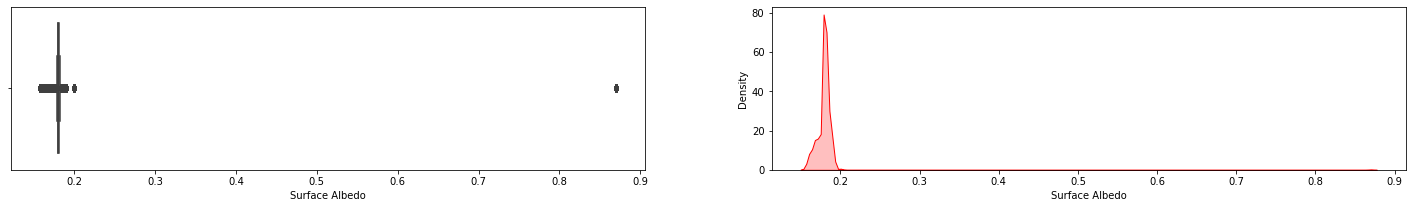

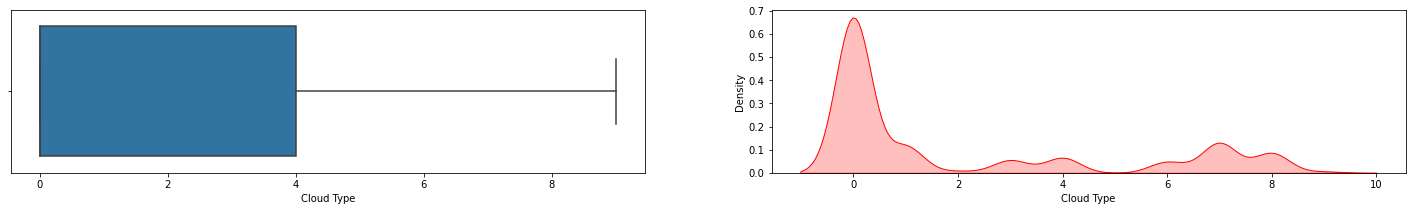

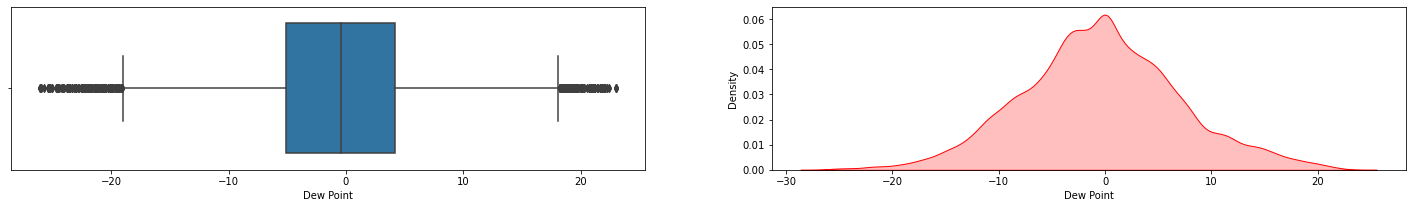

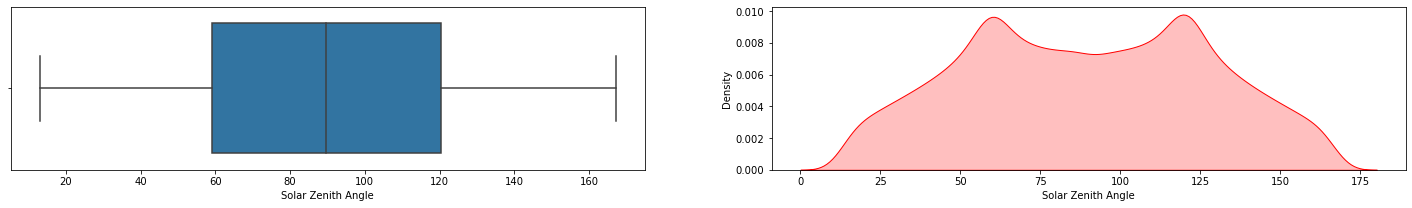

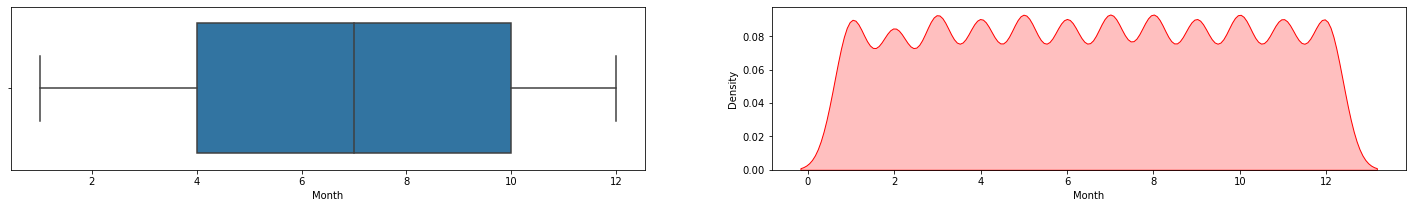

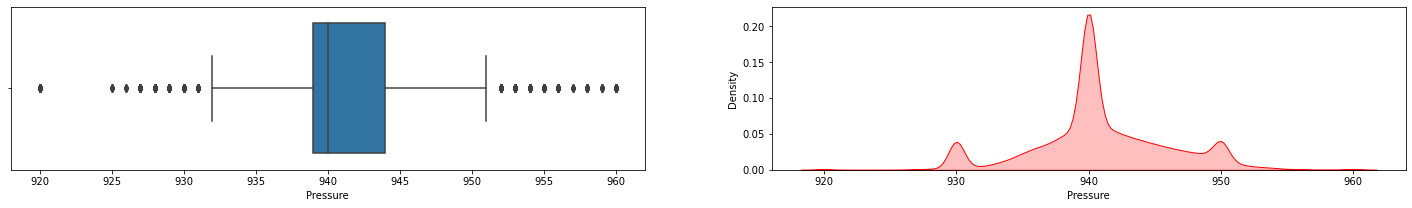

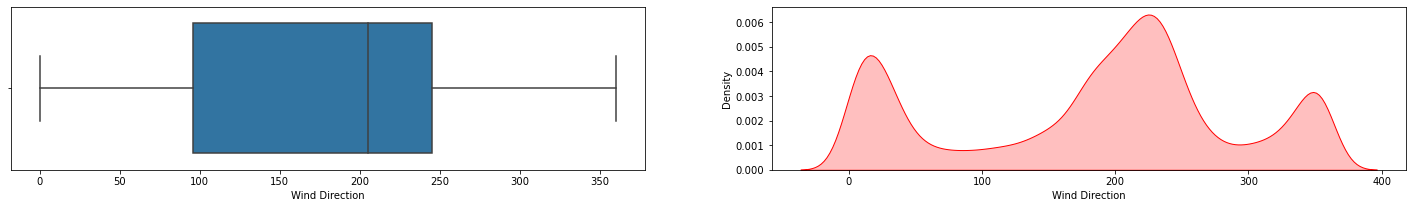

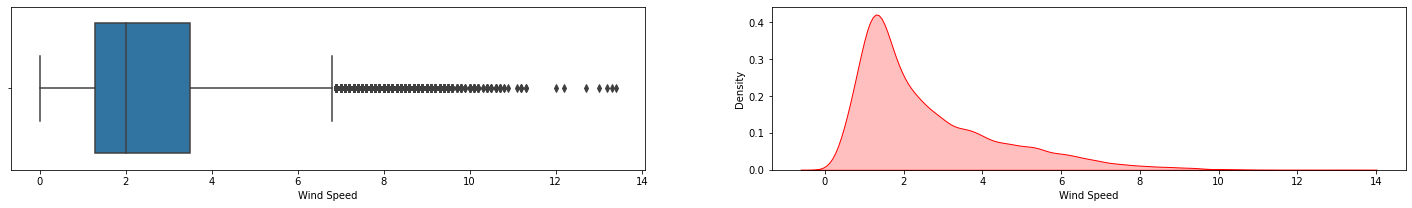

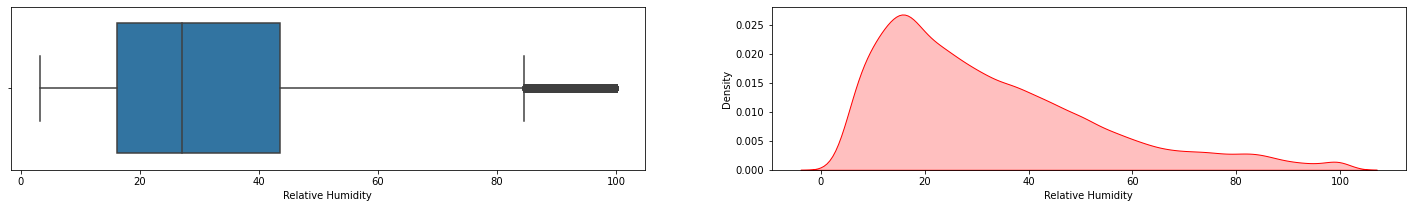

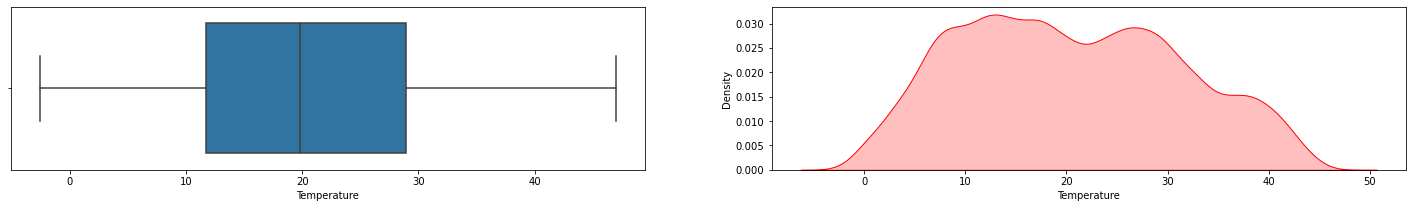

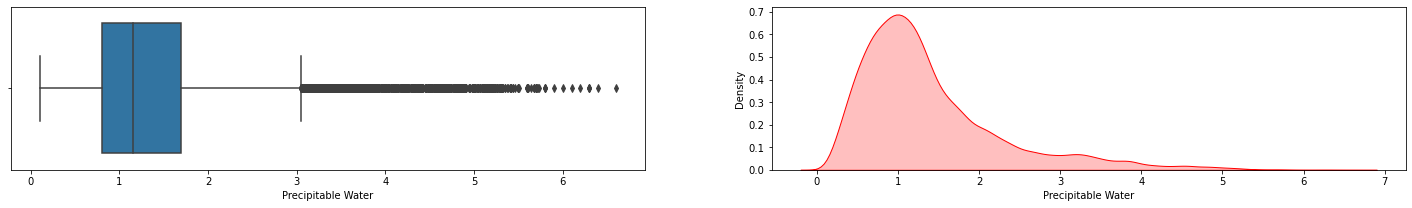

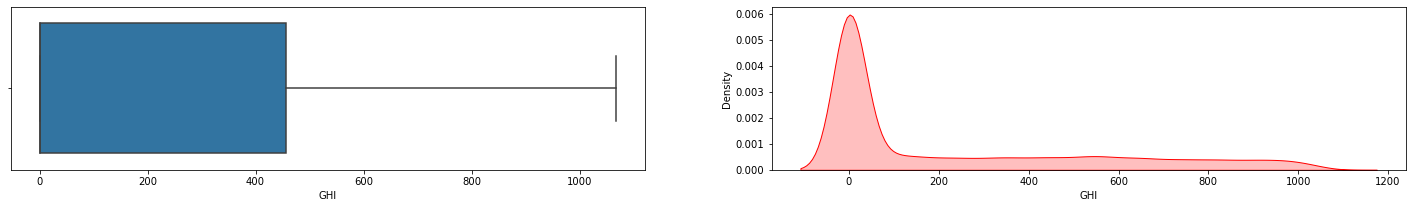

In [25]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
#outlier detection
from matplotlib import gridspec
for i in final_df.iloc[:,3:15].columns:
    fig = plt.figure(figsize=(25,3))
    gs = gridspec.GridSpec(1, 2) 
    ax=plt.subplot(gs[0,0])
    ax=sns.boxplot(final_df[i])
    ax1=plt.subplot(gs[0,1])
    sns.kdeplot(data=final_df[i],color='red', shade=True)
    plt.xlabel(i)
    plt.show()
    

### #surface albedo,dewPoint,pressure,windspeed,relative humidity,precipitable water are the columns that are having outliers

In [26]:
from scipy import stats
z = np.abs(stats.zscore(final_df.iloc[:,3:14]))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
data_clean = final_df[(z<3).all(axis=1)]
data_clean.shape

(50032, 15)

In [27]:
data_clean.iloc[:,3:15].describe()

,Surface Albedo,Cloud Type,Dew Point,Solar Zenith Angle,Month,Pressure,Wind Direction,Wind Speed,Relative Humidity,Temperature,Precipitable Water,GHI
count,50032.000000,50032.000000,50032.000000,50032.000000,50032.000000,50032.000000,50032.000000,50032.000000,50032.000000,50032.000000,50032.000000,50032.000000
mean,0.178902,2.041354,-0.782693,90.010034,6.579069,941.000919,183.503692,2.508700,31.214569,20.431352,1.328536,231.236489
std,0.007014,2.954302,7.070028,37.836431,3.451602,4.987242,107.801469,1.665009,19.615000,10.805882,0.780600,316.257952
min,0.157000,0.000000,-22.800000,12.990000,1.000000,926.000000,0.000000,0.000000,3.280000,-2.600000,0.143000,0.000000
25%,0.180000,0.000000,-5.200000,59.580000,4.000000,939.000000,91.900000,1.300000,15.907500,11.900000,0.800000,0.000000
50%,0.180000,0.000000,-0.700000,89.870000,7.000000,940.000000,205.000000,1.900000,26.435000,19.600000,1.115000,0.000000
75%,0.181000,4.000000,4.000000,120.420000,10.000000,944.000000,247.000000,3.400000,42.332500,28.700000,1.673000,451.000000
max,0.200000,9.000000,21.000000,167.150000,12.000000,956.000000,360.000000,8.000000,94.630000,47.000000,4.061000,1067.000000


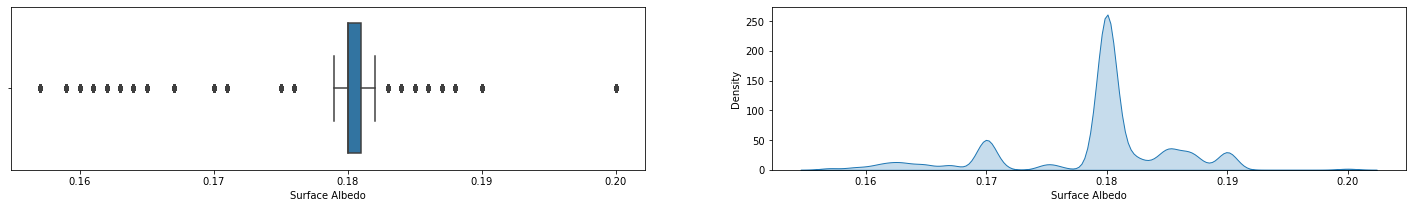

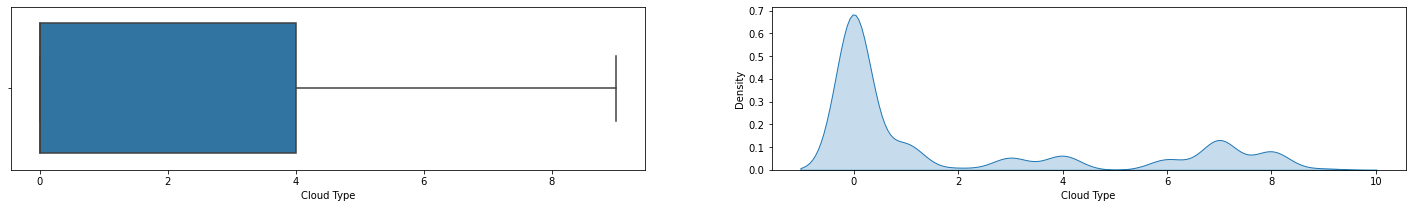

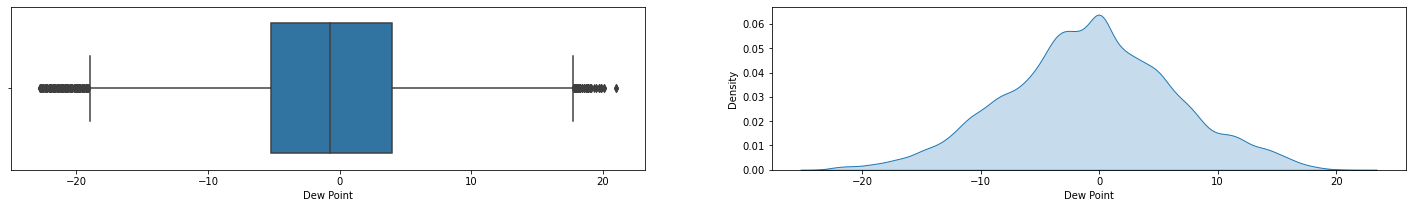

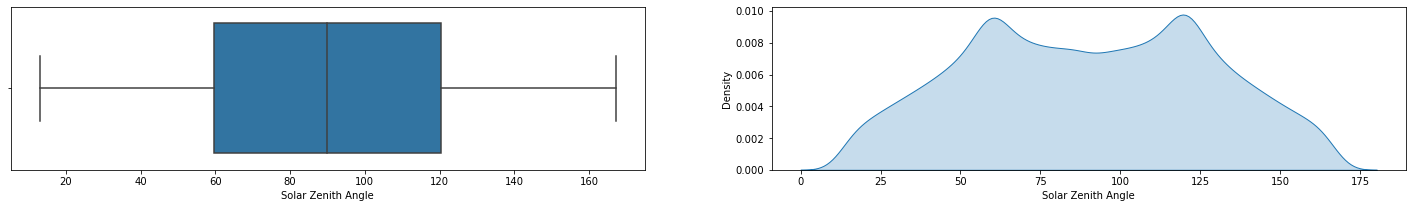

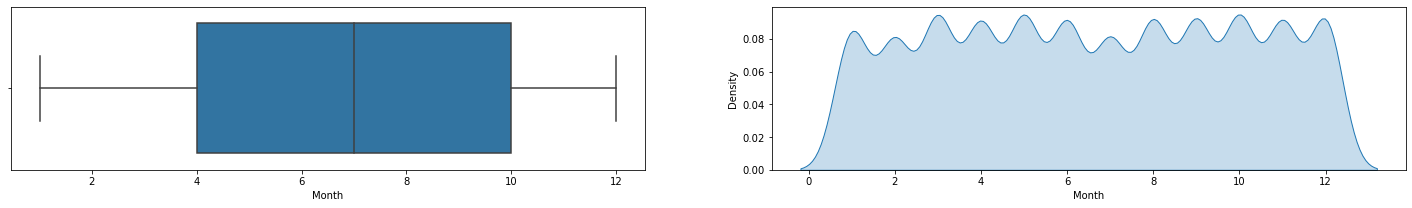

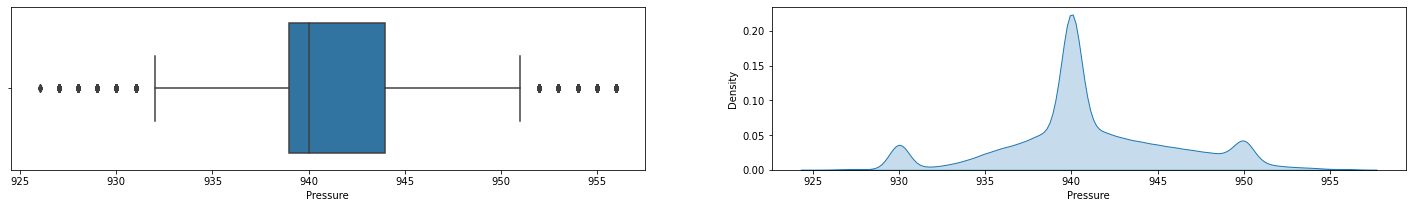

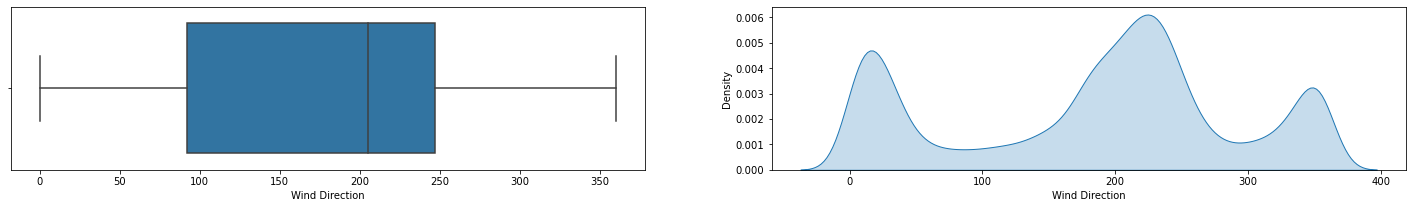

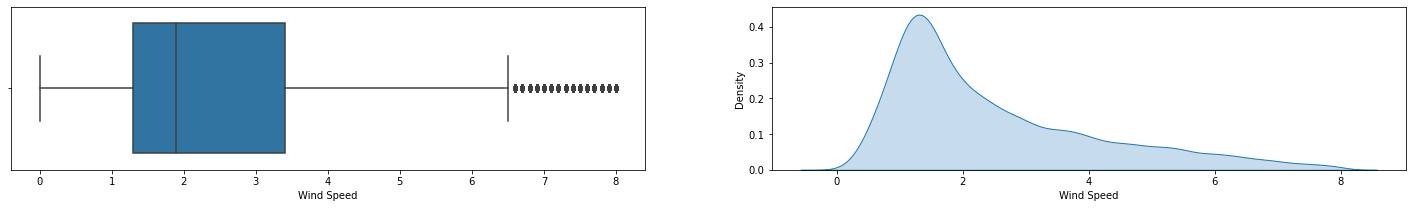

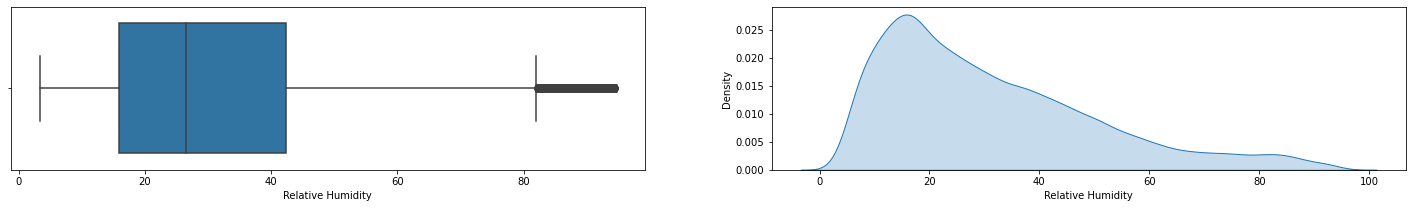

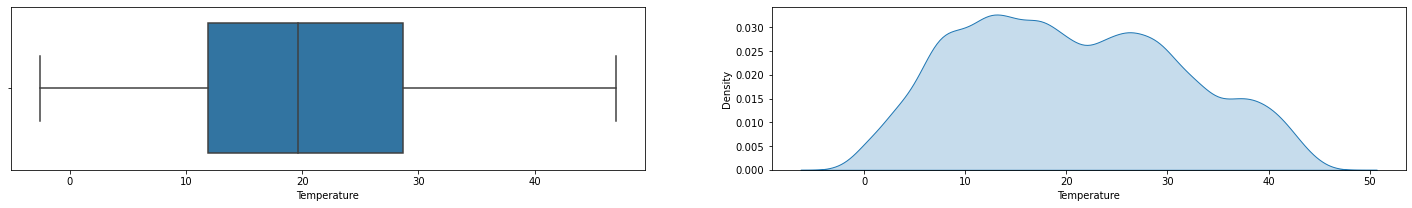

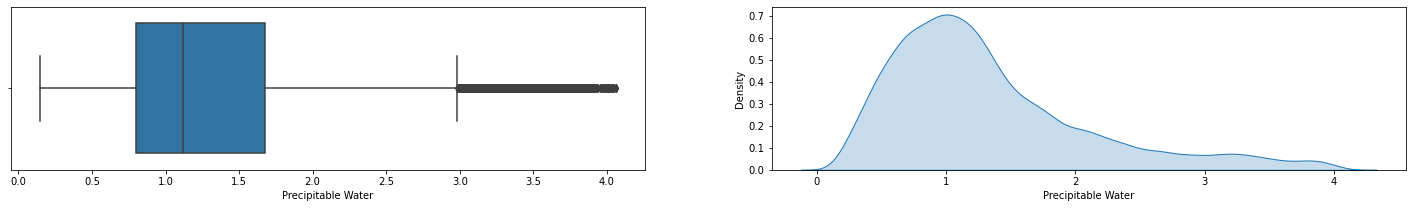

In [28]:
for i in data_clean.iloc[:,3:14].columns:
    fig = plt.figure(figsize=(25,3))
    gs = gridspec.GridSpec(1, 2) 
    ax=plt.subplot(gs[0,0])
    ax=sns.boxplot(data_clean[i])
    ax1=plt.subplot(gs[0,1])
    sns.kdeplot(data=data_clean[i], shade=True)
    plt.xlabel(i)
    plt.show()

In [29]:
X=data_clean.iloc[:,0:14]
y=data_clean['GHI']
y.describe()

count    50032.000000
mean       231.236489
std        316.257952
min          0.000000
25%          0.000000
50%          0.000000
75%        451.000000
max       1067.000000
Name: GHI, dtype: float64

In [30]:
X.describe()

,Year,Day,Hour Minute,Surface Albedo,Cloud Type,Dew Point,Solar Zenith Angle,Month,Pressure,Wind Direction,Wind Speed,Relative Humidity,Temperature,Precipitable Water
count,50032.000000,50032.000000,50032.000000,50032.000000,50032.000000,50032.000000,50032.000000,50032.000000,50032.000000,50032.000000,50032.000000,50032.000000,50032.000000,50032.000000
mean,2018.016629,15.711764,11.670251,0.178902,2.041354,-0.782693,90.010034,6.579069,941.000919,183.503692,2.508700,31.214569,20.431352,1.328536
std,0.815298,8.816905,6.938799,0.007014,2.954302,7.070028,37.836431,3.451602,4.987242,107.801469,1.665009,19.615000,10.805882,0.780600
min,2017.000000,1.000000,0.000000,0.157000,0.000000,-22.800000,12.990000,1.000000,926.000000,0.000000,0.000000,3.280000,-2.600000,0.143000
25%,2017.000000,8.000000,6.000000,0.180000,0.000000,-5.200000,59.580000,4.000000,939.000000,91.900000,1.300000,15.907500,11.900000,0.800000
50%,2018.000000,16.000000,11.300000,0.180000,0.000000,-0.700000,89.870000,7.000000,940.000000,205.000000,1.900000,26.435000,19.600000,1.115000
75%,2019.000000,23.000000,18.000000,0.181000,4.000000,4.000000,120.420000,10.000000,944.000000,247.000000,3.400000,42.332500,28.700000,1.673000
max,2019.000000,31.000000,23.300000,0.200000,9.000000,21.000000,167.150000,12.000000,956.000000,360.000000,8.000000,94.630000,47.000000,4.061000


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
y_pred_lr_test=lr_clf.predict(X_test)
y_pred_lr_train = lr_clf.predict(X_train)
lr_clf.score(X_test,y_test)

0.7858000716184804

In [33]:
print(' R2 score lr_test :', r2_score(y_test,y_pred_lr_test))
print(' RMSE for lr_test :', np.sqrt(mean_squared_error(y_test,y_pred_lr_test)))

 R2 score lr_test : 0.7858000716184804
 RMSE for lr_test : 147.06361610771057


In [34]:
print(' R2 score lr_train :', r2_score(y_train,y_pred_lr_train))
print(' RMSE for lr_train :', np.sqrt(mean_squared_error(y_train,y_pred_lr_train)))

 R2 score lr_train : 0.7797055514834221
 RMSE for lr_train : 148.25576993666027


In [35]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.7835661 , 0.77937817, 0.78088071, 0.78317966, 0.78351667])

In [36]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.782104,{'normalize': True}
1,lasso,0.781753,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.978157,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [37]:
df6=data_clean.copy()

In [38]:
import math
import matplotlib
from sklearn import preprocessing
from matplotlib import style
matplotlib.rcParams["figure.figsize"] = (14,8)
style.use('ggplot')

0.7806718325058847


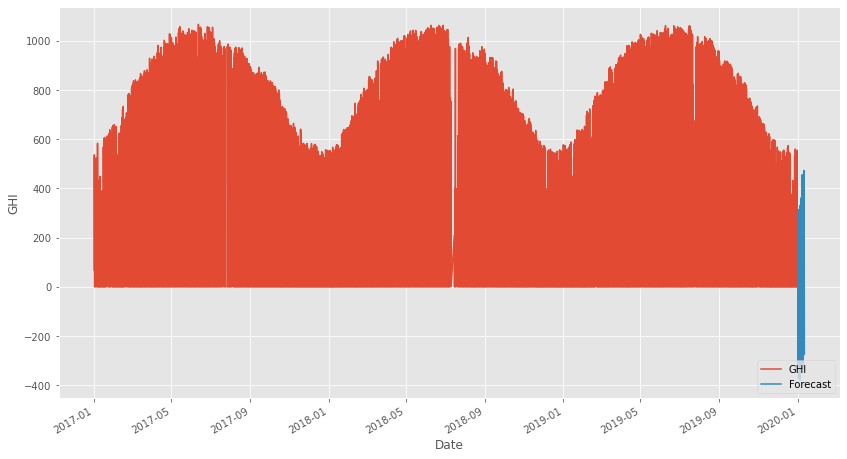

In [39]:

forecast_out = int(math.ceil(0.01 * len(df6)))

X = np.array(df6.drop(['GHI'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]

y = np.array(df6['GHI'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

forecast_sets = clf.predict(X_lately)
df6['Forecast'] = np.nan

last_date = df6.iloc[-1].name
last_unix = last_date.timestamp()
one_half_hour = 1800
next_unix = last_unix + one_half_hour

for i in forecast_sets:
    next_half_hour = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 1800
    df6.loc[next_half_hour] = [np.nan for _ in range(len(df6.columns)-1)]+[i]

df6['GHI'].plot()
df6['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('GHI')
plt.show()


In [40]:
X_lately.shape

(501, 14)

In [41]:
forecast_out

501

In [42]:
df6.head()

,Year,Day,Hour Minute,Surface Albedo,Cloud Type,Dew Point,Solar Zenith Angle,Month,Pressure,Wind Direction,Wind Speed,Relative Humidity,Temperature,Precipitable Water,GHI,Forecast
2017-01-01 07:30:00,2017.0,1.0,7.3,0.157,1.0,1.0,84.21,1.0,930.0,335.1,1.4,90.96,6.0,1.124,68.0,NaN
2017-01-01 08:00:00,2017.0,1.0,8.0,0.157,1.0,2.0,79.35,1.0,930.0,325.9,1.7,82.71,8.0,1.106,148.0,NaN
2017-01-01 08:30:00,2017.0,1.0,8.3,0.157,0.0,2.0,74.82,1.0,930.0,325.9,1.4,77.18,9.0,1.101,230.0,NaN
2017-01-01 09:00:00,2017.0,1.0,9.0,0.157,0.0,2.0,70.71,1.0,930.0,316.1,1.1,70.16,10.0,1.096,308.0,NaN
2017-01-01 09:30:00,2017.0,1.0,9.3,0.157,0.0,2.0,67.08,1.0,930.0,316.1,0.9,65.57,11.0,1.088,377.0,NaN


In [43]:
df6.tail()

,Year,Day,Hour Minute,Surface Albedo,Cloud Type,Dew Point,Solar Zenith Angle,Month,Pressure,Wind Direction,Wind Speed,Relative Humidity,Temperature,Precipitable Water,GHI,Forecast
2020-01-11 13:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-192.194981
2020-01-11 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-185.131346
2020-01-11 14:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-213.814843
2020-01-11 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-238.836279
2020-01-11 15:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-275.292031


In [44]:
df6.shape

(50533, 16)

In [45]:
df7=data_clean.copy()

In [46]:
X = np.array(df7.drop(['GHI'], 1))
X

array([[ 2.017e+03,  1.000e+00,  7.300e+00, ...,  9.096e+01,  6.000e+00,
         1.124e+00],
       [ 2.017e+03,  1.000e+00,  8.000e+00, ...,  8.271e+01,  8.000e+00,
         1.106e+00],
       [ 2.017e+03,  1.000e+00,  8.300e+00, ...,  7.718e+01,  9.000e+00,
         1.101e+00],
       ...,
       [ 2.019e+03,  3.100e+01,  2.230e+01, ...,  3.910e+01, -5.000e-01,
         4.000e-01],
       [ 2.019e+03,  3.100e+01,  2.300e+01, ...,  3.978e+01, -7.000e-01,
         4.000e-01],
       [ 2.019e+03,  3.100e+01,  2.330e+01, ...,  4.012e+01, -8.000e-01,
         4.000e-01]])

In [47]:
y = np.array(df7['GHI'])
y

array([ 68, 148, 230, ...,   0,   0,   0], dtype=int64)

In [48]:
data_clean.to_csv('data_cleaned.csv', index = True)

In [49]:
data_clean.index

DatetimeIndex(['2017-01-01 07:30:00', '2017-01-01 08:00:00',
               '2017-01-01 08:30:00', '2017-01-01 09:00:00',
               '2017-01-01 09:30:00', '2017-01-01 10:00:00',
               '2017-01-01 10:30:00', '2017-01-01 11:00:00',
               '2017-01-01 11:30:00', '2017-01-01 12:00:00',
               ...
               '2019-12-31 19:00:00', '2019-12-31 19:30:00',
               '2019-12-31 20:00:00', '2019-12-31 20:30:00',
               '2019-12-31 21:00:00', '2019-12-31 21:30:00',
               '2019-12-31 22:00:00', '2019-12-31 22:30:00',
               '2019-12-31 23:00:00', '2019-12-31 23:30:00'],
              dtype='datetime64[ns]', length=50032, freq=None)

#### As Random Tree Regressor has 97% accuaracy we will use it

In [50]:
data_clean.index

DatetimeIndex(['2017-01-01 07:30:00', '2017-01-01 08:00:00',
               '2017-01-01 08:30:00', '2017-01-01 09:00:00',
               '2017-01-01 09:30:00', '2017-01-01 10:00:00',
               '2017-01-01 10:30:00', '2017-01-01 11:00:00',
               '2017-01-01 11:30:00', '2017-01-01 12:00:00',
               ...
               '2019-12-31 19:00:00', '2019-12-31 19:30:00',
               '2019-12-31 20:00:00', '2019-12-31 20:30:00',
               '2019-12-31 21:00:00', '2019-12-31 21:30:00',
               '2019-12-31 22:00:00', '2019-12-31 22:30:00',
               '2019-12-31 23:00:00', '2019-12-31 23:30:00'],
              dtype='datetime64[ns]', length=50032, freq=None)

In [51]:

def hr_forecast(A):
    df7=data_clean.copy()
    forecast_out = int(math.ceil(0.0019 * len(df7)))

    X = np.array(df7.drop(['GHI'], 1))
    X = preprocessing.scale(X)
    X_lately = X[-forecast_out:]

    y = np.array(df7['GHI'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = DecisionTreeRegressor(criterion='friedman_mse',splitter='random')
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    #print(confidence)

    forecast_sets = clf.predict(X_lately)
    df7['Forecast'] = np.nan
    

    '''
    last_date = df7.iloc[-1].name
    last_unix = last_date.timestamp()
    one_half_hour = 1800
    #next_unix = last_unix + one_half_hour'''
    next_unix=A

    for i in forecast_sets:
        #next_unix=1577817000
        next_half_hour = datetime.datetime.fromtimestamp(next_unix)
        next_unix += 1800
        df7.loc[next_half_hour] = [np.nan for _ in range(len(df7.columns)-1)]+[i]

    df7['GHI'].plot()
    df7['Forecast'].plot()
    plt.legend(loc=4)
    plt.xlabel('Date')
    plt.ylabel('GHI')
    plt.show()
    #fig.savefig('my_plot.png')
    return confidence,df7

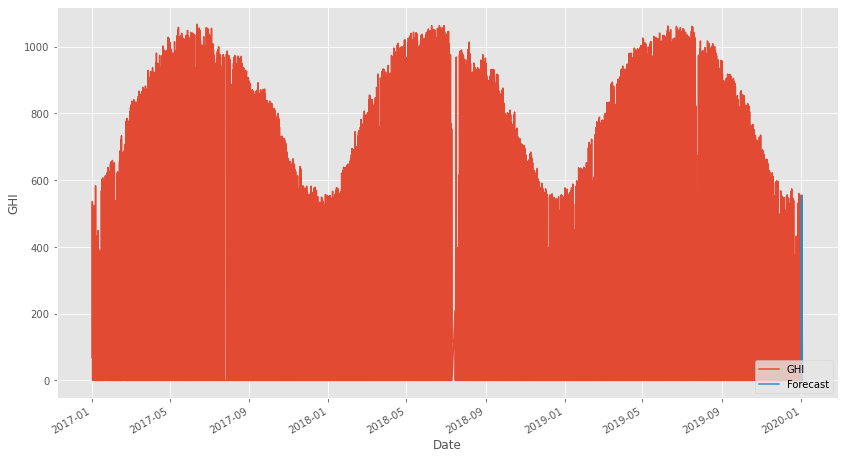

In [52]:
next_48hrs_forecast=hr_forecast(1577817000)

In [72]:
df8=data_clean.copy()
X = np.array(df8.drop(['GHI'], 1))
y = np.array(df8['GHI'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
dt_clf = DecisionTreeRegressor(criterion='friedman_mse',splitter='random')
dt_clf.fit(X_train, y_train)
confidence = dt_clf.score(X_test, y_test)
print(confidence)

0.9789817113014913


In [86]:
import pickle
with open('decidion_model.pickle','wb') as f:
    pickle.dump(dt_clf,f)

In [88]:
df8.head()

,Year,Day,Hour Minute,Surface Albedo,Cloud Type,Dew Point,Solar Zenith Angle,Month,Pressure,Wind Direction,Wind Speed,Relative Humidity,Temperature,Precipitable Water,GHI
2017-01-01 07:30:00,2017,1,7.3,0.157,1,1.0,84.21,1,930,335.1,1.4,90.96,6.0,1.124,68
2017-01-01 08:00:00,2017,1,8.0,0.157,1,2.0,79.35,1,930,325.9,1.7,82.71,8.0,1.106,148
2017-01-01 08:30:00,2017,1,8.3,0.157,0,2.0,74.82,1,930,325.9,1.4,77.18,9.0,1.101,230
2017-01-01 09:00:00,2017,1,9.0,0.157,0,2.0,70.71,1,930,316.1,1.1,70.16,10.0,1.096,308
2017-01-01 09:30:00,2017,1,9.3,0.157,0,2.0,67.08,1,930,316.1,0.9,65.57,11.0,1.088,377


In [91]:
df8.describe()

,Year,Day,Hour Minute,Surface Albedo,Cloud Type,Dew Point,Solar Zenith Angle,Month,Pressure,Wind Direction,Wind Speed,Relative Humidity,Temperature,Precipitable Water,GHI
count,50032.000000,50032.000000,50032.000000,50032.000000,50032.000000,50032.000000,50032.000000,50032.000000,50032.000000,50032.000000,50032.000000,50032.000000,50032.000000,50032.000000,50032.000000
mean,2018.016629,15.711764,11.670251,0.178902,2.041354,-0.782693,90.010034,6.579069,941.000919,183.503692,2.508700,31.214569,20.431352,1.328536,231.236489
std,0.815298,8.816905,6.938799,0.007014,2.954302,7.070028,37.836431,3.451602,4.987242,107.801469,1.665009,19.615000,10.805882,0.780600,316.257952
min,2017.000000,1.000000,0.000000,0.157000,0.000000,-22.800000,12.990000,1.000000,926.000000,0.000000,0.000000,3.280000,-2.600000,0.143000,0.000000
25%,2017.000000,8.000000,6.000000,0.180000,0.000000,-5.200000,59.580000,4.000000,939.000000,91.900000,1.300000,15.907500,11.900000,0.800000,0.000000
50%,2018.000000,16.000000,11.300000,0.180000,0.000000,-0.700000,89.870000,7.000000,940.000000,205.000000,1.900000,26.435000,19.600000,1.115000,0.000000
75%,2019.000000,23.000000,18.000000,0.181000,4.000000,4.000000,120.420000,10.000000,944.000000,247.000000,3.400000,42.332500,28.700000,1.673000,451.000000
max,2019.000000,31.000000,23.300000,0.200000,9.000000,21.000000,167.150000,12.000000,956.000000,360.000000,8.000000,94.630000,47.000000,4.061000,1067.000000


In [92]:
df8['Dew Point']

2017-01-01 07:30:00     1.0
2017-01-01 08:00:00     2.0
2017-01-01 08:30:00     2.0
2017-01-01 09:00:00     2.0
2017-01-01 09:30:00     2.0
                       ... 
2019-12-31 21:30:00   -12.3
2019-12-31 22:00:00   -12.7
2019-12-31 22:30:00   -12.7
2019-12-31 23:00:00   -12.7
2019-12-31 23:30:00   -12.7
Name: Dew Point, Length: 50032, dtype: float64

In [74]:
df7.head()

,Year,Day,Hour Minute,Surface Albedo,Cloud Type,Dew Point,Solar Zenith Angle,Month,Pressure,Wind Direction,Wind Speed,Relative Humidity,Temperature,Precipitable Water,GHI
2017-01-01 07:30:00,2017,1,7.3,0.157,1,1.0,84.21,1,930,335.1,1.4,90.96,6.0,1.124,68
2017-01-01 08:00:00,2017,1,8.0,0.157,1,2.0,79.35,1,930,325.9,1.7,82.71,8.0,1.106,148
2017-01-01 08:30:00,2017,1,8.3,0.157,0,2.0,74.82,1,930,325.9,1.4,77.18,9.0,1.101,230
2017-01-01 09:00:00,2017,1,9.0,0.157,0,2.0,70.71,1,930,316.1,1.1,70.16,10.0,1.096,308
2017-01-01 09:30:00,2017,1,9.3,0.157,0,2.0,67.08,1,930,316.1,0.9,65.57,11.0,1.088,377


In [75]:
df7.tail()

,Year,Day,Hour Minute,Surface Albedo,Cloud Type,Dew Point,Solar Zenith Angle,Month,Pressure,Wind Direction,Wind Speed,Relative Humidity,Temperature,Precipitable Water,GHI
2019-12-31 21:30:00,2019,31,21.3,0.17,4,-12.3,148.27,12,942,16.0,2.5,39.28,-0.1,0.4,0
2019-12-31 22:00:00,2019,31,22.0,0.17,0,-12.7,153.99,12,942,11.0,2.7,38.54,-0.3,0.4,0
2019-12-31 22:30:00,2019,31,22.3,0.17,0,-12.7,159.31,12,942,6.0,2.9,39.10,-0.5,0.4,0
2019-12-31 23:00:00,2019,31,23.0,0.17,0,-12.7,163.78,12,942,2.0,3.0,39.78,-0.7,0.4,0
2019-12-31 23:30:00,2019,31,23.3,0.17,0,-12.7,166.51,12,943,180.0,3.1,40.12,-0.8,0.4,0


In [76]:
df7.shape

(50032, 15)

In [81]:
df9=pd.read_csv('next_48_hours.csv')
df9.head()

,Unnamed: 0,Forecast
0,2020-01-01 00:00:00,0.0
1,2020-01-01 00:30:00,0.0
2,2020-01-01 01:00:00,0.0
3,2020-01-01 01:30:00,0.0
4,2020-01-01 02:00:00,0.0


#### plotting GHI for next 48 hours

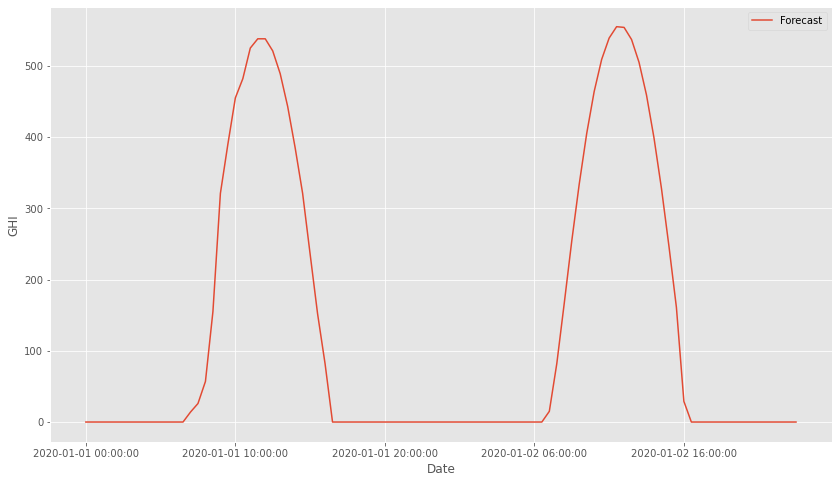

In [82]:
df9.plot.line(x='Unnamed: 0',y='Forecast')
#plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('GHI')
plt.show()

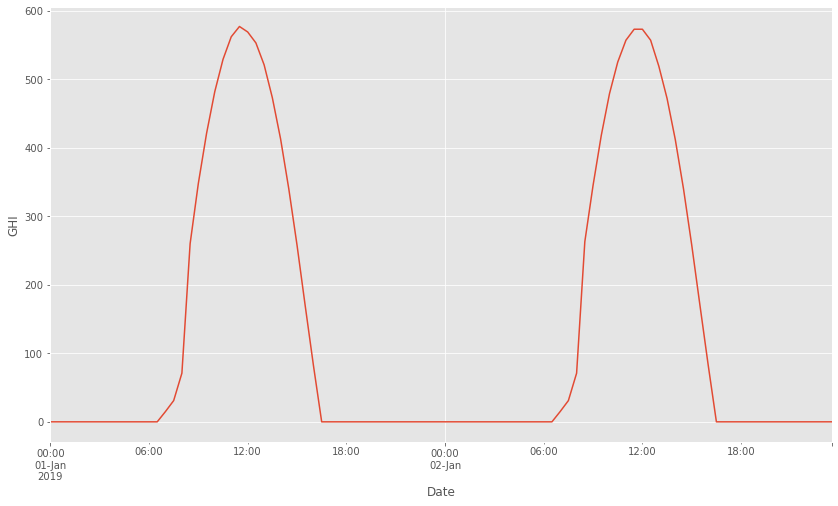

In [83]:
df1['GHI'].iloc[0:96].plot()
#plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('GHI')
plt.show()

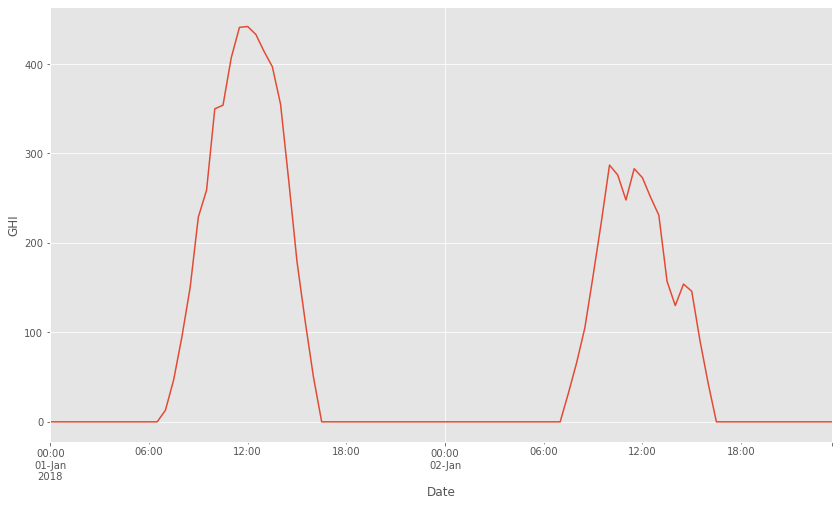

In [84]:
d['GHI'].iloc[0:96].plot()
#plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('GHI')
plt.show()

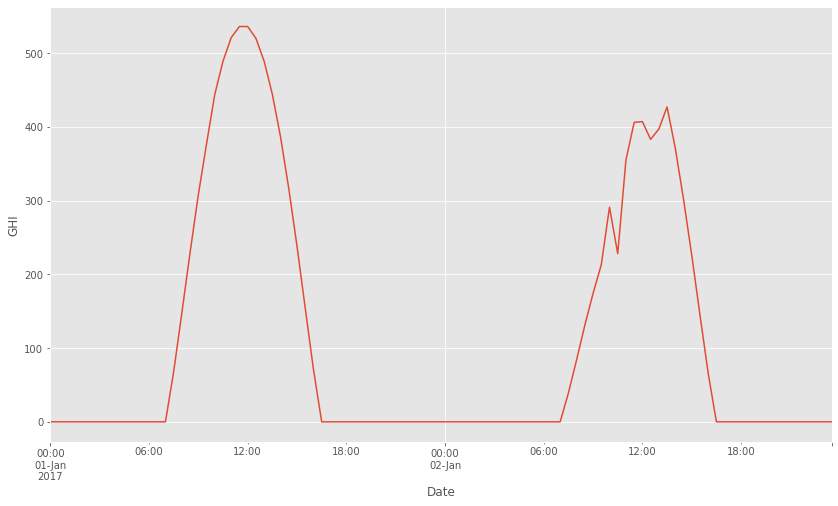

In [85]:
df['GHI'].iloc[0:96].plot()
#plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('GHI')
plt.show()

In [65]:
df1['GHI'].iloc[17500:]

2019-12-31 14:00:00    399
2019-12-31 14:30:00    328
2019-12-31 15:00:00    247
2019-12-31 15:30:00    161
2019-12-31 16:00:00     29
2019-12-31 16:30:00      0
2019-12-31 17:00:00      0
2019-12-31 17:30:00      0
2019-12-31 18:00:00      0
2019-12-31 18:30:00      0
2019-12-31 19:00:00      0
2019-12-31 19:30:00      0
2019-12-31 20:00:00      0
2019-12-31 20:30:00      0
2019-12-31 21:00:00      0
2019-12-31 21:30:00      0
2019-12-31 22:00:00      0
2019-12-31 22:30:00      0
2019-12-31 23:00:00      0
2019-12-31 23:30:00      0
Name: GHI, dtype: int64

In [66]:
df1['GHI'].iloc[0:15]

2019-01-01 00:00:00     0
2019-01-01 00:30:00     0
2019-01-01 01:00:00     0
2019-01-01 01:30:00     0
2019-01-01 02:00:00     0
2019-01-01 02:30:00     0
2019-01-01 03:00:00     0
2019-01-01 03:30:00     0
2019-01-01 04:00:00     0
2019-01-01 04:30:00     0
2019-01-01 05:00:00     0
2019-01-01 05:30:00     0
2019-01-01 06:00:00     0
2019-01-01 06:30:00     0
2019-01-01 07:00:00    15
Name: GHI, dtype: int64

In [67]:
df['GHI'].iloc[15:35]

2017-01-01 07:30:00     68
2017-01-01 08:00:00    148
2017-01-01 08:30:00    230
2017-01-01 09:00:00    308
2017-01-01 09:30:00    377
2017-01-01 10:00:00    444
2017-01-01 10:30:00    489
2017-01-01 11:00:00    521
2017-01-01 11:30:00    536
2017-01-01 12:00:00    536
2017-01-01 12:30:00    520
2017-01-01 13:00:00    489
2017-01-01 13:30:00    444
2017-01-01 14:00:00    386
2017-01-01 14:30:00    316
2017-01-01 15:00:00    238
2017-01-01 15:30:00    154
2017-01-01 16:00:00     71
2017-01-01 16:30:00      0
2017-01-01 17:00:00      0
Name: GHI, dtype: int64

In [68]:
df9.iloc[15:35]

,Date,Forecast
15,2020-01-01 07:30:00,26.0
16,2020-01-01 08:00:00,57.0
17,2020-01-01 08:30:00,155.0
18,2020-01-01 09:00:00,321.0
19,2020-01-01 09:30:00,390.0
20,2020-01-01 10:00:00,455.0
21,2020-01-01 10:30:00,482.0
22,2020-01-01 11:00:00,525.0
23,2020-01-01 11:30:00,538.0
24,2020-01-01 12:00:00,538.0


In [69]:
d['GHI'].iloc[15:35]

2018-01-01 07:30:00     47
2018-01-01 08:00:00     95
2018-01-01 08:30:00    150
2018-01-01 09:00:00    229
2018-01-01 09:30:00    259
2018-01-01 10:00:00    350
2018-01-01 10:30:00    354
2018-01-01 11:00:00    407
2018-01-01 11:30:00    441
2018-01-01 12:00:00    442
2018-01-01 12:30:00    433
2018-01-01 13:00:00    414
2018-01-01 13:30:00    397
2018-01-01 14:00:00    355
2018-01-01 14:30:00    269
2018-01-01 15:00:00    179
2018-01-01 15:30:00    112
2018-01-01 16:00:00     50
2018-01-01 16:30:00      0
2018-01-01 17:00:00      0
Name: GHI, dtype: int64